<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [5]:
boston_df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [6]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [7]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
boston_df.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [9]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


## **Question 1:** Is there a significant difference in the median value of houses bounded by the Charles river or not?

## **Hypothesis** H0= variances are equal, H1= variances are different

<AxesSubplot:ylabel='MEDV'>

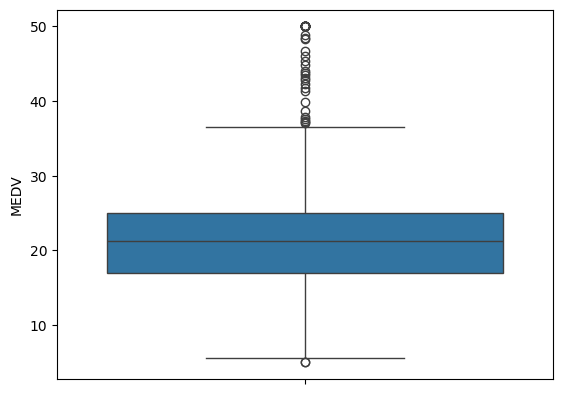

In [10]:
sns.boxplot(boston_df['MEDV'])

In [83]:
scipy.stats.levene(boston_df[boston_df['CHAS']==0.0]['MEDV'],boston_df[boston_df['CHAS']==1.0]['MEDV'],center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

## As pvalue is less than alpha=0.05 so the variances of the consider samples are different from levene test.

## **T Test**

In [64]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0.0]['MEDV'],boston_df[boston_df['CHAS']==1.0]['MEDV'],equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

## **Conclusion for Question 1:** Since the p-value is less than alpha value 0.05, from T test we reject the null hypothesis as there is enough proof that there is a statistical difference in Median value of owner-occupied homes based on Charles River dummy variable.


## **Question 2:** Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

## **Hypothesis** H0= All three means are equal, H1= Atleast one of the  means differ

<AxesSubplot:xlabel='CHAS', ylabel='MEDV'>

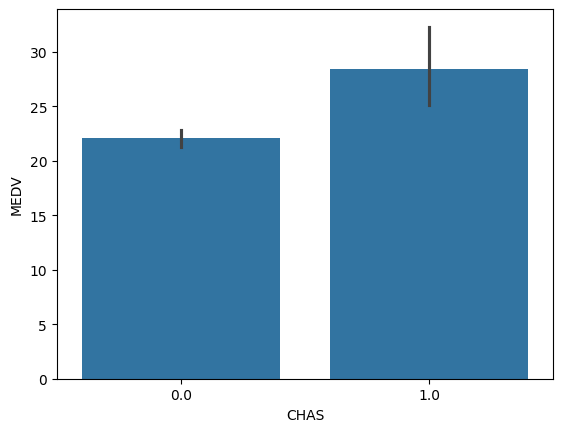

In [19]:
sns.barplot(x=boston_df['CHAS'],y=boston_df['MEDV'])

<AxesSubplot:xlabel='age_group', ylabel='MEDV'>

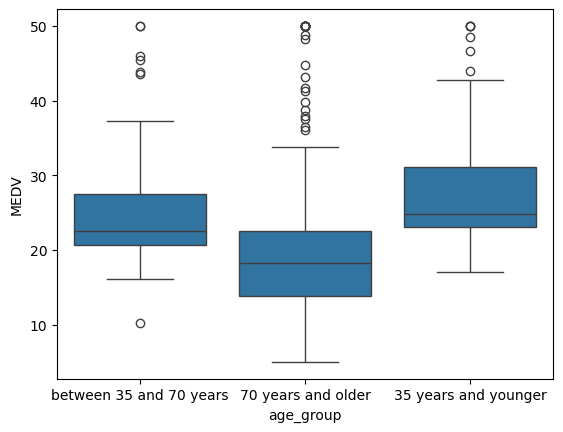

In [72]:
boston_df.loc[(boston_df['AGE']<=35),'age_group']='35 years and younger'
boston_df.loc[(boston_df['AGE']>35)&(boston_df['AGE']<70),'age_group']='between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70),'age_group']='70 years and older'
sns.boxplot(x='age_group',y='MEDV',data=boston_df)

In [67]:
scipy.stats.levene(boston_df[boston_df['age_group']=='35 years and younger']['MEDV'],boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV'],boston_df[boston_df['age_group']=='70 years and older']['MEDV'],center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

## As pvalue in levene test is greater than 0.05 so null hypoothesis cannot be rejected but we will further test it from ANOVA.

In [78]:
thirtyfive=boston_df[boston_df['age_group']=='35 years and younger']['MEDV']
thirtyfive_seventy=boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV']
seventy=boston_df[boston_df['age_group']=='70 years and older']['MEDV']
f_statistic,p_value=scipy.stats.f_oneway(thirtyfive,thirtyfive_seventy,seventy)
print("F-Statistic: {0} , P-Value {1}".format(f_statistic,p_value))

F-Statistic: 36.40764999196599 , P-Value 1.7105011022702984e-15


## **Conclusion for Question 2:** As pvalue < 0.05 we reject null hypotheses and conclude that there is atleast one of the means differ as standard taking ANOVA result more authentic.

## **Question 3:** Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

## **Hypothesis** H0= No relationship between nitric oxides concentration (parts per 10 million) and proportion of non-retail business acres per town., H1= there is a relationship between nitric oxides concentration (parts per 10 million) and proportion of non-retail business acres per town.

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

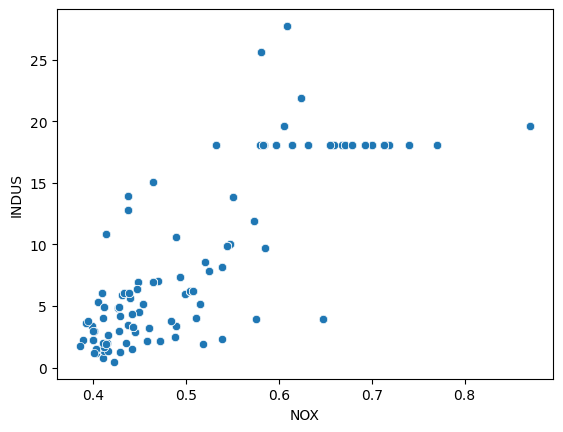

In [23]:
sns.scatterplot(data=boston_df,x='NOX',y='INDUS')

## **Pearson Corelation Test**

In [73]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

## **Conclusion for Question 3:** As pvalue < 0.05 we reject null hypotheses and conclude that there is a relationship between nitric oxides concentration (parts per 10 million) and proportion of non-retail business acres per town.


## **Question 4:** What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

## **Hypothesis** H0= Means of weighted distances to five Boston employment centres and Median value of owner-occupied homes are equal, H1= Means of weighted distances to five Boston employment centres and Median value of owner-occupied homes differ

<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

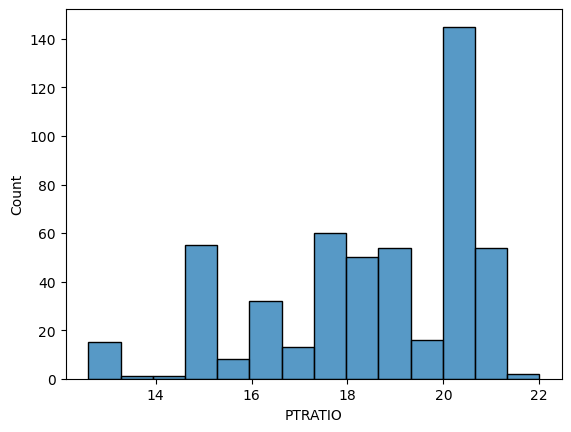

In [26]:
sns.histplot(boston_df['PTRATIO'])

## **Linear Regression Test**

In [56]:
x=boston_df['DIS']

In [57]:
y=boston_df['MEDV']

In [59]:
x=sm.add_constant(x)

In [60]:
model=sm.OLS(y,x).fit()
prediction=model.predict(x)

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           1.21e-08
Time:                        22:25:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Conclusion for Question 4:** As pvalue is less than alpha=0.05, so we reject null hypothses there is a clear difference in the means of weighted distances to five Boston employment centres and Median value of owner-occupied homes.